![Cancer](https://media2.giphy.com/media/sCqnpiUFN228E/giphy.gif)

# Introduction

Among the most important areas in the world is human health. Exploring the methods for preventing and detecting health problems has sparked a lot of interest. Cancer is the most common illness that has a significant impact on human health. A malignant tumor is a cancerous tumor that develops as a result of the disease. Colon cancer, together with breast cancer and lung cancer, is the third most deadly disease in the United States, killing 49,190 people in 2016 [1]. This is a cancer that begins in the large intestine colon, which is the last component of the digestive system.

The machine learning technique should be used in this assignment to aid in the detection of malignant cells and the differentiation of cell types in colon cancer. Deep learning algorithms such as AlexNet, Resnet50, and VGG19 will all be developed and evaluated in this notebook, with XGBoost being the sole non-deep learning option to tackle the issue.

# Import necessary library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.utils import resample
import seaborn as sns
import warnings
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
import plotly.express as px 
from tensorflow.keras.preprocessing import image
import hashlib, os
from tensorflow.keras.optimizers import SGD, Adagrad
from keras.regularizers import l2
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from zipfile import ZipFile
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import cv2
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD, Adagrad
import numpy as np
from tensorflow import keras
from tensorflow.python.util import tf_inspect
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Lambda, Input
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications.inception_v3 import InceptionV3
from keras_preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

# Tensorflow
#from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D,ZeroPadding2D, AveragePooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Add
from keras import regularizers
from keras import Input
from tensorflow.keras import initializers
from keras.initializers import GlorotUniform

from keras import Model
from keras import backend as K

# https://medium.com/mlearning-ai/implementation-of-googlenet-on-keras-d9873aeed83c
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.layers import Concatenate
from keras.layers.merge import concatenate


warnings.filterwarnings("ignore")

# *Task1: Classify  images  according  to  whether  given  cell  image  represents  a cancerous cells or not (isCancerous)*

## Load dataset

In [ ]:
main_data = pd.read_csv("data_labels_mainData.csv")
main_data_extra = pd.read_csv("data_labels_extraData.csv")

In [ ]:

ZipFile("Image_classification_data.zip").extractall(".")

In [ ]:
main_data

In [ ]:
main_data_extra

<h1 style = "text-align:center; color:white; font-weight:600; padding:0.5em; background-color: #B02B00; border-radius:25px ; box-shadow: 0 0 20px 0 #ACA7CB; margin-right:3em; margin-bottom:1em">1. Data Preparation & Data exploration (EDA)</h1> 

In [ ]:
cancer_data = main_data.groupby('patientID').any()

sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize = (8 , 8))
graph = sns.countplot(ax=ax1,x='isCancerous', data=cancer_data, palette='tab10')
graph.set_title("Positive vs Negative cancerous patients", fontsize=20)
graph.set_xticklabels(graph.get_xticklabels(),rotation=0)
ax1.set_ylim([0, 60])
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 1, height, ha="center")

51 out of total of 77 persons who have cancer, the rest 26 out of 77 is the number of people who don't have cancer cell

In [ ]:

pie=px.pie(data_frame=main_data,
           names='cellTypeName',
           color_discrete_sequence=px.colors.qualitative.Pastel,
           width=550,
           height=550)
pie.update_layout(title_text='Distribution of cell types', title_x=0.5)
pie.update_traces(textinfo='value+label+percent')
pie

From the graph, we can conclude the epithelial is cancerous cell type as all the patients who have cancer all possess epithelia cell type. As the number of cells of the epithelial type have the biggest number in the record (41.2%)

In [ ]:
sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize = (8 , 8))
graph = sns.countplot(ax=ax1,x='isCancerous', data=main_data, palette='tab10')
graph.set_title("Positive vs Negative cancerous patients", fontsize=20)
graph.set_xticklabels(graph.get_xticklabels(),rotation=0)
ax1.set_ylim([0, 6000])
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 1, height, ha="center")

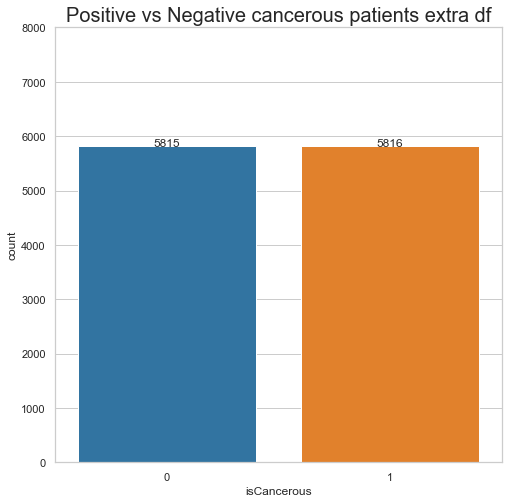

In [294]:
sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize = (8 , 8))
graph = sns.countplot(ax=ax1,x='isCancerous', data=main_data, palette='tab10')
graph.set_title("Positive vs Negative cancerous patients extra df", fontsize=20)
graph.set_xticklabels(graph.get_xticklabels(),rotation=0)
ax1.set_ylim([0, 8000])
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 1, height, ha="center")

<Figure size 432x288 with 0 Axes>

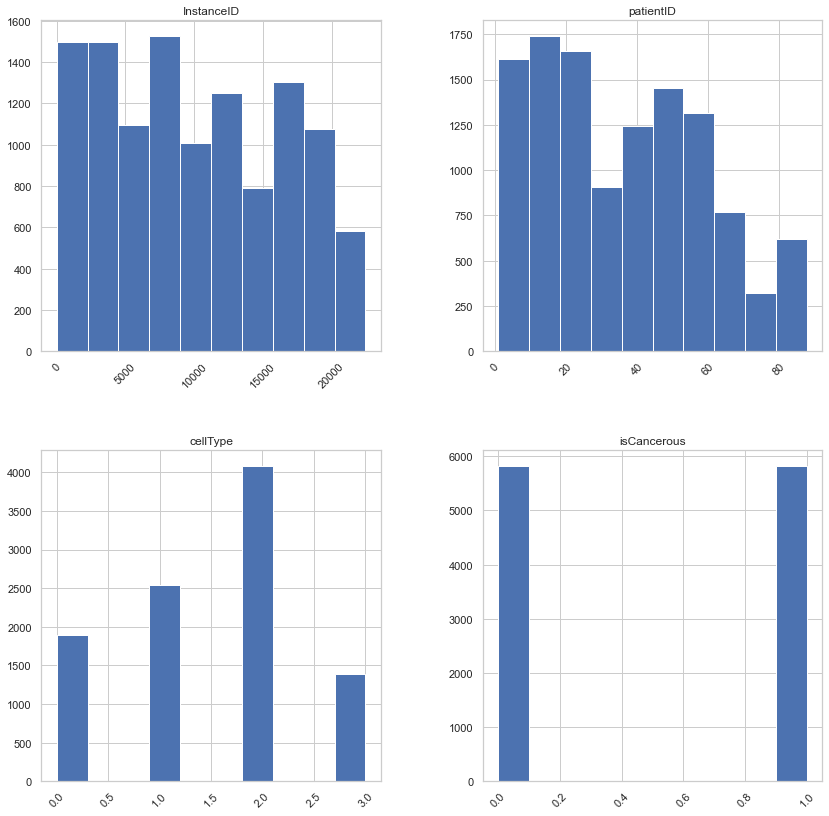

In [295]:
plt.figure()
main_data.hist(figsize=(14,14), xrot=45)
plt.show()

<h1 style = "text-align:center; color:white; font-weight:600; padding:0.5em; background-color: #B02B00; border-radius:25px ; box-shadow: 0 0 20px 0 #ACA7CB; margin-right:3em; margin-bottom:1em">2. Data Processing </h1> 

## 2.1 Check Label

In [ ]:

CELL_TYPE_SAMPLE_SIZE = 5

for cell_type_name in main_data['cellTypeName'].unique():
    df_sample = main_data[main_data['cellTypeName'] == cell_type_name].sample(CELL_TYPE_SAMPLE_SIZE)
    plt.figure(figsize=(CELL_TYPE_SAMPLE_SIZE ** 2, CELL_TYPE_SAMPLE_SIZE))
    for image_index, image_name in enumerate(df_sample['ImageName']):
        plt.subplot(1, CELL_TYPE_SAMPLE_SIZE + 1, image_index+1)
        plt.grid(None)
        img = image.load_img('./patch_images/' + image_name, target_size=(27, 27))
        plt.imshow(img)
        plt.title(cell_type_name)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
No image is missing label
</p>
</div>


## 2.2 Check duplicate

In [ ]:
import os
file_list = os.listdir('./patch_images/')
print(len(file_list))

In [ ]:

duplicates = []
hash_keys = dict()
for index, filename in  enumerate(os.listdir('./patch_images/')):  #listdir('.') = current directory

    if os.path.isfile('./patch_images/'+filename):
        with open('./patch_images/'+filename, 'rb') as f:
            filehash = hashlib.md5(f.read()).hexdigest()
        if filehash not in hash_keys: 
            hash_keys[filehash] = index
        else:
            duplicates.append((index,hash_keys[filehash]))
            print(filename)


In [ ]:
from imageio import imread
for file_indexes in duplicates[:30]:
    try:
    
        plt.subplot(121),plt.imshow(imread('./patch_images/'+ file_list[file_indexes[1]]))
        plt.title(file_indexes[1]), plt.xticks([]), plt.yticks([])

        plt.subplot(122),plt.imshow(imread('./patch_images/'+ file_list[file_indexes[0]]))
        plt.title(str(file_indexes[0]) + ' duplicate'), plt.xticks([]), plt.yticks([])
        plt.show()
    
    except OSError as e:
        continue

In [ ]:
# Remove duplicate
for index in duplicates:
    os.remove('./patch_images/' + file_list[index[0]] )

In [297]:
for index in duplicates:
    main_data = main_data[main_data.ImageName  != file_list[index[0]]]
    df_random_cancer_from_extra = df_random_cancer_from_extra[df_random_cancer_from_extra.ImageName  != file_list[index[0]]]

In [298]:
print(main_data)

       InstanceID  patientID  ImageName cellTypeName  cellType  isCancerous
0           22405          1  22405.png   fibroblast       0.0            0
1           22406          1  22406.png   fibroblast       0.0            0
2           22407          1  22407.png   fibroblast       0.0            0
3           22408          1  22408.png   fibroblast       0.0            0
4           22409          1  22409.png   fibroblast       0.0            0
...           ...        ...        ...          ...       ...          ...
11626        7212         71   7212.png          NaN       NaN            1
11627        9878         86   9878.png          NaN       NaN            1
11628        6517         68   6517.png          NaN       NaN            1
11629       14199         66  14199.png          NaN       NaN            1
11630        5311         78   5311.png          NaN       NaN            1

[11631 rows x 6 columns]


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
There are 3 duplicate image so I have remove it from image folder and the dataset
</p>
</div>


## 2.3 Imbalancing data

This bias in the training dataset can impact various machine learning algorithms, causing some to completely disregard the minority class. This is a concern since projections are often based on the minority class.

One method for dealing with class imbalance is to randomly resample the training dataset. The two basic methods for randomly resampling an unbalanced dataset are to eliminate instances from the majority class, which is known as undersampling, and to duplicate examples from the minority class, which is known as oversampling.

In [ ]:
is_cancer_class_count = main_data.isCancerous.value_counts()
amount_for_balance = abs(is_cancer_class_count[0] - is_cancer_class_count[1])
df_random_cancer_from_extra = main_data_extra[main_data_extra['isCancerous'] == 1].sample(amount_for_balance)
for index in duplicates:
    main_data = main_data[main_data.ImageName  != file_list[index[0]]]
    df_random_cancer_from_extra = df_random_cancer_from_extra[df_random_cancer_from_extra.ImageName  != file_list[index[0]]]

In [299]:
## Store the data for task 2
main_data_task2 = main_data

In [ ]:
main_data = pd.concat([main_data, df_random_cancer_from_extra], ignore_index=True)
main_data.isCancerous.value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
raw_train_task, test_data = train_test_split(main_data[['ImageName', 'isCancerous']], test_size=0.2, random_state=9999)

## 2.4 Generate data for fitting model

In [ ]:
raw_train_task, test_data

In [ ]:
raw_train_task, val_data = train_test_split(raw_train_task, test_size=0.25, random_state=9999)

print("Train data : {}, Val Data: {}, Test Data: {}".format(raw_train_task.shape[0], val_data.shape[0], test_data.shape[0]))

In [ ]:
# document: https://keras.io/api/preprocessing/image/#imagedatagenerator-class
from keras_preprocessing.image import ImageDataGenerator

def get_dataframe_iterator(dataframe, 
                            image_shape = (27, 27), 
                            batch_size = 64,
                            x_col = "ImageName",
                            y_col = "cellTypeName",
                            classes = ["fibroblast", "inflammatory", "epithelial", "others"]):
    dataframe[y_col] = dataframe[y_col].apply(str)
    generator = ImageDataGenerator(
        rescale = 1./255, 
        rotation_range = 20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    ) 
    iterator = generator.flow_from_dataframe(
        dataframe = dataframe,
        directory = "./patch_images", 
        x_col = x_col,
        y_col = y_col,
        classes = classes, 
        class_mode = "categorical", 
        target_size = image_shape, 
        batch_size = batch_size,
    )
    return iterator

In [ ]:
train_iterator = get_dataframe_iterator(raw_train_task, y_col='isCancerous', classes=['0','1'])
val_iterator = get_dataframe_iterator(val_data, y_col='isCancerous', classes=['0','1'])
test_iterator = get_dataframe_iterator(test_data, y_col='isCancerous', classes=['0','1'])

## 2.5 Define function for fitting model and measurement

In [ ]:
def fit_model(model, iterator, val_iterator, 
              epochs = 100, 
              export_dir = './export',
              name = 'default'):
    history = model.fit_generator(
        iterator,
        validation_data = val_iterator,
        epochs = epochs,
        verbose = 1
    )
    return history

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
METRICS = ['accuracy', precision_m, recall_m, f1_m]

## 2.6 Processing image

In [ ]:

list_of_images = []

for path in main_data['ImageName']:
  image_path = os.path.join("./patch_images", path)
  image = cv2.imread(image_path , cv2.IMREAD_GRAYSCALE)
  list_of_images.append(image)

list_of_images = np.asarray(list_of_images)
np.array(list_of_images).shape

In [ ]:
list_of_images = np.reshape(list_of_images,  (-1 , 27 * 27))
list_of_images = pd.DataFrame(list_of_images)

In [ ]:
train_x_cancer , validate_x_cancer, train_y_cancer , validate_y_cancer = train_test_split(list_of_images, main_data['isCancerous'], test_size=0.2 , random_state = 42, shuffle = True)

print("Train X shape: " , train_x_cancer.shape)
print("Train Y shape: " , train_y_cancer.shape)
print("Validate X shape: " , validate_x_cancer.shape)
print("Validate Y shape: " , validate_y_cancer.shape)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
Put images in to an array and split in train_x_cancer , validate_x_cancer, train_y_cancer , validate_y_cancer
</p>
</div>


<h1 style = "text-align:center; color:white; font-weight:600; padding:0.5em; background-color: #B02B00; border-radius:25px ; box-shadow: 0 0 20px 0 #ACA7CB; margin-right:3em; margin-bottom:1em">3. Model Traning</h1> 

## XGBoost

### *Definition
- It is a supervised learninng for the binary classification problem.
- It is decision tree-based machine learning algorithm and optimized by the Gradient Boosting framewor.
- It builds trees in parallel. 
- It won lots of award in Kaggle

![logistic-regression-definition](https://vtitech.vn/wp-content/uploads/2020/09/xgboost.jpeg)

### Purposes:
   In task 1, the problem is binary classification (maligant or benign cell). Therefore, it is reasonable for us to apply the XGBoost algorithm to build our model and make the prediction, since this is consider as one of the best algorithm decision tree-based, we expect to product a higher accuracy and precision.



### 1. Default model (without any parameters)

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

# We will use objective = "binary:logistic" since this problem is binary classification
xgbr = xgb.XGBClassifier(objective='binary:logistic')
xgbr.fit(train_x_cancer, train_y_cancer)


y_pred_validate = xgbr.predict(validate_x_cancer)
prediction_validate = [round(value) for value in y_pred_validate]

y_pred_train = xgbr.predict(train_x_cancer)
prediction_train = [round(value) for value in y_pred_train]

In [ ]:

print("Train report")
print(classification_report(train_y_cancer, y_pred_train))
print("Validate report")
print(classification_report(validate_y_cancer, prediction_validate))

In [ ]:
# evaluate predictions
print("Train F1 Score:" + str(f1_score (train_y_cancer, prediction_train)))
print("Train Accuracy Score:" + str(accuracy_score (train_y_cancer, prediction_train)))
print("--------------------------------------------------------")
print("Test F1 Score:" + str(f1_score(validate_y_cancer, prediction_validate)))
print("Test Accuracy Score:" + str(accuracy_score (validate_y_cancer, prediction_validate)))

In [ ]:
import pandas as pd

def plot_conf_matrix (conf_matrix, dtype):
    class_names = [0,1]
    fontsize=14
    df_conf_matrix = pd.DataFrame(
            conf_matrix, index=class_names, columns=class_names, 
        )
    fig = plt.figure()
    heatmap = sns.heatmap(df_conf_matrix, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix for {0}'.format(dtype))

In [ ]:
plot_conf_matrix(confusion_matrix(validate_y_cancer, y_pred_validate), "Test data")

In [ ]:
pd.DataFrame(confusion_matrix(validate_y_cancer,y_pred_validate),\
            columns=["Predicted Not-Cancerous", "Predicted Cancerous"],\
            index=["Not-Cancerous","Cancerous"])

### 🔬 Observation:

1. According to the report, the weighted avg for precision and recall for train data is 1 and 1
2. According to the report, the weighted avg for precision and recall for validate data is 0.81 and 0.81
3. Since the difference between train and validate is pretty large( more than 20%), thus, we can conclude this model are overfiting. Therefore, we need to apply hyper tuning to solve this problem

### 2. Using GridSearchCV to find best params and calculate RMSE

####  **Hyperparameter tuning chosen**
1. gamma:  to figure out the pseudo-regularisation.
2. learning_rate: to figure the step size at each iteration.
3. max_depths: to figure out max level number of the tree. This parameter can cause overfit but also increase the performance.
4. n_jobs: to set the number of job to 10 to use all processors.
5. n_estimators: to limit the trees in ensemble.

In [ ]:
from sklearn.model_selection import GridSearchCV
# We will use objective = "binary:logistic" since this problem is binary classification

params = { 'gamma': [0,0.2,1],
              'learning_rate': [0.01, 0.06, 0.1],
              'max_depth': [5,6,7],
              'n_estimators': [50],
              }
gs_xgbr = xgb.XGBClassifier(objective= 'binary:logistic',nthread=4,seed=42)
grid_search_cv = GridSearchCV(estimator=gs_xgbr, 
                   param_grid=params,
                   scoring = 'roc_auc',
                    n_jobs = 10,
                    cv = 5,
                    verbose=True)
grid_search_cv.fit(train_x_cancer, train_y_cancer)
print("Best parameters:", grid_search_cv.best_params_)
best_n_estimators_value = grid_search_cv.best_params_['n_estimators']
best_max_depth_value = grid_search_cv.best_params_['max_depth']
best_learning_rate_value = grid_search_cv.best_params_['learning_rate']
best_gamma = grid_search_cv.best_params_['gamma']
best_score = grid_search_cv.best_score_
print("Best Score: ", (grid_search_cv.best_score_)**(1/2.0))

In [ ]:
## Predict the y train and y validate using our model with x train and x validate
gs_y_pred_validate = grid_search_cv.predict(validate_x_cancer)
gs_prediction_validate = [round(value) for value in gs_y_pred_validate]

gs_y_pred_train = grid_search_cv.predict(train_x_cancer)
gs_prediction_train = [round(value) for value in gs_y_pred_train]

print("Train report")
print(classification_report(train_y_cancer, gs_y_pred_train))
print("Validation report")
print(classification_report(validate_y_cancer, gs_prediction_validate))

In [ ]:
# evaluate predictions

# accuracy = accuracy_score(validate_y_cancer, prediction_validate)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

print("Train F1 Score:" + str(f1_score (train_y_cancer, gs_prediction_train)))
print("Train Accuracy Score:" + str(accuracy_score (train_y_cancer, gs_prediction_train)))
print("--------------------------------------------------------")
print("Test F1 Score:" + str(f1_score(validate_y_cancer, gs_prediction_validate)))
print("Test Accuracy Score:" + str(accuracy_score (validate_y_cancer, gs_prediction_validate)))

### 🔬 Observation:

1. According to the report, the weighted avg for precision and recall for train data is about 0.97 and 0.98
2. According to the report, the weighted avg for precision and recall for validate data is about 0.81 and 0.81
3. According to the report, the validate f1 score is about 0.98 whereas the train f1 score is about 0.81.
4. The overfit between train and test is about 20% (which is extremly large).


In [ ]:
plot_conf_matrix(confusion_matrix(validate_y_cancer, gs_y_pred_validate), "Test data")

In [ ]:
pd.DataFrame(confusion_matrix(validate_y_cancer,gs_y_pred_validate),\
            columns=["Predicted Not-Cancerous", "Predicted Cancerous"],\
            index=["Not-Cancerous","Cancerous"])

### 🔬 Observation: 
For this model, when diagnose 1112 not-cancerous cells, the machine predict corect 912 cells, which is 81%. On the other hand, when predict for cancerous cells, the machine predict correct 978 over 1215 cell, which 81%. As our a problem is diagnose whether the cell is cancerous or not, thus, it is more ***important*** to consider the ***false negative*** than ***false postive***. In other words, if the normal cell is diagnose as positive, we need to pay extra fee for medical and place for that patient whereas the positive cell is diagnose as negative, that patient may lost their life. Therefore, compare between the money and people life, obviously, we should pay more attention on the people life which is affected by false negative. Thus, this model is acceptable since the percentage of recall is 81%

In [ ]:
def plot_roc_curve(roc_auc_train, roc_auc_test):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr_tr, tpr_tr, 'g', label = 'Training AUC = %0.2f' % roc_auc_train)
    plt.plot(fpr_ts, tpr_ts, 'b', label = 'Testing AUC = %0.2f' % roc_auc_test)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
#train data ROC
fpr_tr, tpr_tr, threshold = roc_curve(train_y_cancer, gs_y_pred_train)
roc_auc_train = auc(fpr_tr, tpr_tr)

#test data ROC
fpr_ts, tpr_ts, threshold = roc_curve(validate_y_cancer, gs_y_pred_validate)
roc_auc_test = auc(fpr_ts, tpr_ts)

#Plot ROC curve
plot_roc_curve(roc_auc_train, roc_auc_test)

### 🔬 Observation: 
According to the graph, our model is extremely overfitting. The closet point is when testing AUC equals to 0.81 and training AUC equals to 0.98

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

evaluation_xgboost_t1 = [None]
evaluation_xgboost_t1.append(accuracy_score(validate_y_cancer,gs_y_pred_validate))
evaluation_xgboost_t1.append(precision_score(validate_y_cancer, gs_y_pred_validate))
evaluation_xgboost_t1.append(recall_score(validate_y_cancer, gs_y_pred_validate))
evaluation_xgboost_t1.append(f1_score(validate_y_cancer, gs_y_pred_validate))

 ### Conclusion: 
 After evaluting the model, our group figure out that it provides a good accuaracy and precision for identifying the cancerous and non-cancerous cell type.However, the model has the remarkable overfit eventhough we used the grid search to figure out the best parameters. Therefore, our group continue to explore more approaches in order to fix this problem. One of the most well-known approach at present is neutral network which is also approriate for supervised problem in task 1. Since there are many algorithms inspired by neural network, our group will pick serveral algorithms to train, evaluate and compare to figure out the best model to handle this problem. First, we will use the inceptionV3. 

## InceptionV3

In [ ]:
!pip install keras_vggface

In [ ]:
import keras
!pip install keras_applications
from keras_applications.imagenet_utils import _obtain_input_shape

In [ ]:
model = InceptionV3(include_top=False, input_shape=(75, 75, 3), weights='imagenet')

# Resize Input images to 75x75
newInput = Input(batch_shape=(None, 27, 27, 3))
resizedImg = Lambda(lambda image: tf.compat.v1.image.resize_images(image, (75, 75)))(newInput)
newOutputs = model(resizedImg)
model = Model(newInput, newOutputs)

# Freeze all the layers
for layer in model.layers[:]:
    layer.trainable = False

# Add Dense layer to classify on CIFAR10
output = model.output
output = GlobalAveragePooling2D()(output)
output = Dense(units=2, activation='softmax')(output)
model_inceptionv3 = Model(model.input, output)

model_inceptionv3.summary()

In [ ]:
opt = Adam(lr=0.0045 , amsgrad = True)
model_inceptionv3.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy', metrics=METRICS)

history_inception_v3 = fit_model(model_inceptionv3, train_iterator, val_iterator, 
                                export_dir='.',
                                name="Inception_Task1")

# GoogleNet

In [ ]:
def fit_model_googlenet(model, iterator, val_iterator, 
              epochs = 50, 
              export_dir = './export',
              name = 'default'):
    es = EarlyStopping(monitor='dense_5_accuracy', 
                       mode='max', 
                       verbose=1, 
                       patience=10, 
                       restore_best_weights=True)
    mc = ModelCheckpoint('{}/model_{}.h5'.format(export_dir, name), 
                         monitor='dense_5_accuracy', 
                         mode='max', 
                         save_best_only=True)

    history = model.fit_generator(
        iterator,
        validation_data = val_iterator,
        epochs = epochs,
        verbose = 1,
        callbacks=[mc,es]
    )
    return history

In [ ]:
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 
  # Input: 
  # - f1: number of filters of the 1x1 convolutional layer in the first path
  # - f2_conv1, f2_conv3 are number of filters corresponding to the 1x1 and 3x3 convolutional layers in the second path
  # - f3_conv1, f3_conv5 are the number of filters corresponding to the 1x1 and 5x5  convolutional layer in the third path
  # - f4: number of filters of the 1x1 convolutional layer in the fourth path

  # 1st path:
  path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)

  # 2nd path
  path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu')(path2)

  # 3rd path
  path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu')(path3)

  # 4th path
  path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
  path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)

  output_layer = concatenate([path1, path2, path3, path4], axis = -1)

  return output_layer

In [ ]:
def GoogLeNet():
  # input layer 
  input_layer = Input(shape = (27, 27, 3))

  # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
  X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

  X = ZeroPadding2D(padding=(10, 10))(X)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 1)(X)

  # convolutional layer: filters = 64, strides = 1
  X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)

  # convolutional layer: filters = 192, kernel_size = (3,3)
  X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 1st Inception block
  X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)

  # 2nd Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 3rd Inception block
  X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)

  # Extra network 1:
  X1 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
  X1 = Flatten()(X1)
  X1 = Dense(1024, activation = 'relu')(X1)
  X1 = Dropout(0.7)(X1)
  X1 = Dense(2, activation = 'softmax')(X1) # <----- changed 1000 to 2

  
  # 4th Inception block
  X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 5th Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 6th Inception block
  X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

  # Extra network 2:
  X2 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
  X2 = Flatten()(X2)
  X2 = Dense(1024, activation = 'relu')(X2)
  X2 = Dropout(0.7)(X2)
  X2 = Dense(2, activation = 'softmax')(X2) # <----- changed 1000 to 2
  
  
  # 7th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, 
                      f3_conv5 = 128, f4 = 128)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # 8th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

  # 9th Inception block
  X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

  # Global Average pooling layer 
  X = GlobalAveragePooling2D(name = 'GAPL')(X)

  # Dropoutlayer 
  X = Dropout(0.4)(X)

  # output layer 
  X = Dense(2, activation = 'softmax')(X) # <------ changed from 1000 to 2 
  
  # model
  model = Model(input_layer, [X, X1, X2], name = 'GoogLeNet')

  return model

In [ ]:
model_googlenet_t1 = GoogLeNet()

In [ ]:
from tensorflow.keras.utils import plot_model

model_googlenet_t1.summary()

In [ ]:
plot_model(model_googlenet_t1, show_shapes=True)

In [ ]:
opt = Adam(lr=0.00045, amsgrad = True)
model_googlenet_t1.compile(optimizer=opt, loss='binary_crossentropy',metrics=METRICS)

history_googlenet_t1 = fit_model_googlenet(model_googlenet_t1, train_iterator, val_iterator,
                                export_dir='.',
                                name="GoogLeNet_Task1")

In [ ]:
model_googlenet_t1.save('./googlenet.h5');

In [ ]:
evaluation_googlenet_t1 = model_googlenet_t1.evaluate(test_iterator)

In [ ]:
evaluation_googlenet_t1 = [
    evaluation_googlenet_t1[1], # dense_4_loss
    evaluation_googlenet_t1[4], # dense_4_accuracy
    evaluation_googlenet_t1[5], # dense_4_precision
    evaluation_googlenet_t1[6], # dense_4_recall
    evaluation_googlenet_t1[7]  # dense_4_f1
]

# Resnet50
## Defining an identity block

In [ ]:
# https://medium.com/analytics-vidhya/understanding-and-implementation-of-residual-networks-resnets-b80f9a507b9c
def identity_block(X, f, filters, block, activation='relu'):
    """
    Implementation of the identity block
    
    Arguments:
    X: input tensor
    f: shape for middle CONV kernel size param
    filters: list of number of filters in the CONV layers of the main path
    block: name of this block
    
    Returns:
    X: output, returns a tensor
    """
    
    
    conv_name = 'conv' + block
    bn_name = 'batchNorm' + block
    
    # get filters from parameter
    F1, F2, F3 = filters
    
    # copy the original shape to add it back to the main path
    X_copy = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name + 'a', kernel_initializer = GlorotUniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name + 'a')(X)
    X = Activation(activation)(X)
    
    
    # Second component of main path
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name + 'b', kernel_initializer = GlorotUniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name + 'b')(X)
    X = Activation(activation)(X)

    # Third component of main path 
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name + 'c', kernel_initializer = GlorotUniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name + 'c')(X)

    # add shortcut back to main path, and use relu activation
    X = Add()([X, X_copy])
    X = Activation(activation)(X)
    
    return X

## Defining a convolutional block

In [ ]:
def convolutional_block(X, f, filters, block, s = 2, activation='relu'):
    """
    Implementation of the convolutional block
    
    Arguments:
    X: input tensor
    f: shape for middle CONV kernel size param
    filters: list of number of filters in the CONV layers of the main path
    block: name of this block
    s: stride param to be used for shortcut component
    
    Returns:
    X: output, returns a tensor

    """

    conv_name = 'conv' + block
    bn_name = 'batchNorm' + block
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_copy = X

    # First component
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name + 'a', kernel_initializer  = GlorotUniform(seed= 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name + 'a')(X)
    X = Activation(activation)(X)

    # Second component
    X = Conv2D(F2, (f,f), strides = (1,1), padding = 'same', name = conv_name + 'b', kernel_initializer = GlorotUniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name + 'b')(X)
    X = Activation(activation)(X)

    # Third component
    X = Conv2D(F3, (1,1), strides = (1,1), padding = 'valid', name = conv_name + 'c', kernel_initializer = GlorotUniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name + 'c')(X)

    # Shortcut
    X_copy = Conv2D(F3, (1,1), strides = (s,s), padding = 'valid', name = conv_name + 'd', kernel_initializer = GlorotUniform(seed = 0))(X_copy)
    X_copy = BatchNormalization(axis = 3, name = bn_name + 'd')(X_copy)

    # add shortcut back to main path, and use relu activation
    X = Add()([X, X_copy])
    X = Activation(activation)(X)
    
    return X

## Implementing a ResNet50 architecture

In [ ]:
def ResNet50(input_shape = (27, 27, 3), classes = 2):
    """
    Implementation using the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    MAXPOOl -> TOPLAYER

    reducing the typical 5 stage to 3 stage to reduce time and memory expense

    Arguments:
    input_shape: shape of image, currently is 27x27
    classes: integer, number of classes to identify
    
    returns a Model() instance.
    """
    
    # set x_input as a tensor with shape input_shape
    X_input = Input(input_shape)

    
    # add padding for tensor
    X = ZeroPadding2D((3, 3))(X_input)

    #since resnet only works for images that is 30x30 pixels or higher, we need to add padding pixels for the algorithm to work
    
    # first stage
    X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = initializers.RandomNormal(stddev=0.01))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # second
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], block='2a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], block='2b')
    X = identity_block(X, 3, [64, 64, 256], block='2c')

    X = ZeroPadding2D((1, 1))(X_input)
    
    # third
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], block='3a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], block='3b')
    X = identity_block(X, 3, [128, 128, 512], block='3c')
    X = identity_block(X, 3, [128, 128, 512], block='3d')
    
    # avg pooling
    X = AveragePooling2D()(X)

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='sigmoid', name='fc' + str(classes), kernel_initializer = GlorotUniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [ ]:
model_resnet50_t1 = ResNet50()

In [ ]:
model_resnet50_t1.summary()

In [ ]:
opt = Adam(lr=0.0045 , amsgrad = True)
model_resnet50_t1.compile(optimizer=opt, loss='binary_crossentropy', metrics=METRICS)

history_resnet50_t1 = fit_model(model_resnet50_t1, train_iterator, val_iterator, 
                                export_dir="",
                                name="resnet50_t1")

In [ ]:
evaluation_resnet50_t1 = model_resnet50_t1.evaluate(test_iterator)

# AlexNet

In [ ]:
#Importing library


np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(27, 27, 3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.5))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.7))

#3rd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.9))

#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

In [ ]:
# https://towardsdatascience.com/implementing-alexnet-cnn-architecture-using-tensorflow-2-0-and-keras-2113e090ad98


def AlexNet():
    model = keras.models.Sequential([
        keras.layers.Conv2D(filters=96, kernel_size=(1,1), strides=(1,1), activation='relu', input_shape=(27, 27, 3)),
        keras.layers.BatchNormalization(),
        
        keras.layers.Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        keras.layers.BatchNormalization(),

        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        
        keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
        keras.layers.BatchNormalization(),
        
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        
        keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        keras.layers.BatchNormalization(),
        
        keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        keras.layers.BatchNormalization(),
        
        keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        keras.layers.BatchNormalization(),
        
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(1,1)),
        
        keras.layers.Flatten(),
        
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),
        
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.7),

        keras.layers.Dense(2, activation='sigmoid')
    ])

    return model

In [ ]:
opt = Adam(lr=0.0035)

alex_model = AlexNet()
alex_model.compile(optimizer="SGD", loss='binary_crossentropy', metrics=METRICS)

alex_model.summary()

In [ ]:
task1_AlexNet = fit_model(alex_model, train_iterator, val_iterator,name="Task1_AlexNet")

In [ ]:
evaluate_alex1 = alex_model.evaluate(test_iterator)

# *Task2: Classify  images  according  to  cell-type,  such  as:  fibroblast,  inflammatory, epithelial or others* 

In [ ]:
main_data = main_data_task2

<a id ="IV"></a>
<h2 style = "text-align:center; color:white; font-weight:600; padding:0.5em; background-color: #B02B00; border-radius:25px ; box-shadow: 0 0 20px 0 #ACA7CB; margin-right:3em; margin-bottom:1em">Ⅰ. Cleaning dataset  </h2>

#### Before cleaning the data, let display the dataset to observe it in general

In [ ]:
main_data

<a id ="IV.A1"></a>

### *1. Check Data type*

In [ ]:
## read all info row by row
main_data.info()

### 📚 Reason: 
We need to check data type for overall understanding for our dataset and identifying which column we should keep or change data type for later encoding and better model's performance

<a id ="IV.A2"></a>

### *2. Checking missing values*

### 📚 Reason: 
Missing value can lead to error for machine, thus, we need to check if there is any missing value and fill it.

In [ ]:
# Check if the dataset has any missing value, 
main_data.isnull().values.any()

### 🔬 Observation: 
Since the return value is false, we can conclude that the dataset has no missing values. However, we should double check for every columns

In [ ]:
# Check total missing values for each columns 
main_data.isnull().sum()

### 🔬 Observation: 
There is 100% no missing values in any columns in the dataset, thus, we dont not need to fill any missing values for this dataset

<a id ="IV.A3"></a>

### *3. Check typography*

In [ ]:
celltype_name_values = main_data['cellTypeName'].nunique(dropna=False)
print(celltype_name_values)

In [ ]:
print(main_data['cellTypeName'].unique())

### 📚 Reason: 
Typo value can lead to time runing and storage problem for machine (fibroblast, fibreblast are 2 different values but have same meaning), thus, we check typo preventing same meaningful values

### 🔬 Observation: 
Since the cellTypeName column have 4 different values such as fibroblast, inflammatory, epithelial or others. => no typo

<a id ="IV.A4"></a>

### *4. Convert string column to uppercase*

### 🔬 Observation: 
Since there are only 4 values fibroblast, inflammatory, epithelial in cellTypeName columns. Therefore, we do not need to convert to lowercase or uppercase for this dataset. However, in the larger dataset with multiple values, we should convert to all uppercase or lowercase to avoid duplication 

<a id ="IV.A5"></a>

### 5. Eliminate extra white spaces 

### 🔬 Observation: 
Since the Sepsis column have 4 different values such as fibroblast, inflammatory, epithelial or others => no extra white spaces    

<a id ="IV.A6"></a>

### *6. Check duplication*

In [ ]:
# Empty Datafrane -> no dupplication in the main_data dataframe
duplicate_values = main_data[main_data.duplicated()]
print(duplicate_values)

### 📚 Reason: 
Duplicate data can lead to time runing and storage problem for machine, thus, we need to check if there is any duplicated data and drop it.

### 🔬 Observation: 
There is 100% no duplicated values in the dataset, thus, we dont not need to drop any rows for this dataset

<a id ="IV.A7a"></a>

### 7. Check impossible values 

### 📚 Reason: 
Some time the dataset has some impossible values such as age is negative, thus, we need to check impossible value to find and drop or fix it to improve the accuracy of the machine learing

### 🔬 Observation: 
In this dataset, all of the data are reasonable => no impossible values

<a id ="IV.B8"></a>

### 8. Check outlier 

In [ ]:
plt.rcParams['figure.figsize'] = [10, 7.5]
# plot the boxplot to see the outlier of each numerical column
sns.boxplot(data=main_data,orient="v")
plt.title("Bot-Plots Distribution", y = 1,fontsize = 20, pad = 40);

### 🔬 Observation:
According to the bot-plots, there are completely no outliner in this dataset

### 📚 Reason: 
After finish cleaning the data, we should display the data to double check the data and figure out the count, mean, min , 25%, 50%, 75%, max to prepare for EDA step in later section.

<a id ="VI"></a>

<h2 style = "text-align:center; color:white; font-weight:600; padding:0.5em; background-color: #B02B00; border-radius:25px ; box-shadow: 0 0 20px 0 #ACA7CB; margin-right:3em; margin-bottom:1em">II. Exploratory Data Analysis (EDA)
</h2>

<a id ="V.1"></a>

<h3 style = "color : #F06200; font-style:italic; letter-spacing:0.075em;">1.My hypothesises </h3>

1. The value for each type in the cell type name will be different.

2. The value of `others` class will be the least compare to other classes.


In [ ]:

sns.set_theme(style="darkgrid")
titanic = sns.load_dataset("titanic")
ax = sns.countplot(y="cellTypeName", data=main_data)
ax.set_title("Bar chart to display the total number of each type in cell type name", fontsize=15)
for bars in ax.containers:
    ax.bar_label(bars)
    

### 🔬 Observation: 
In this plot, the vertical axis is cellTypeName and the horizontal axis is count (total values). In overall, the class epithelial has the most value (4079) whereas the other class have the least value (1386). In additional, the different between each class are large, thus, we should consider to solve this problem by using imbalance in the feature engineering step. 

After observation, we can conclude that our hypotheses are correct.

<a id ="VI"></a>

<h2 style = "text-align:center; color:white; font-weight:600; padding:0.5em; background-color: #B02B00; border-radius:25px ; box-shadow: 0 0 20px 0 #ACA7CB; margin-right:3em; margin-bottom:1em">III. Feature Enginnering</h2>

<a id ="VI.1"></a>

<h3 style = "color : #F06200; font-style:italic; letter-spacing:0.075em;">1.Drop Unrealated columns to the target</h3>

### 🔬 Observation: 
Since all columns in the dataset are neccessary => we do not need to drop any columns

<a id ="VI.2"></a>

<h3 style = "color : #F06200; font-style:italic; letter-spacing:0.075em;">2.Class Imbalances</h3>

In [ ]:
print(main_data['cellTypeName'].value_counts())
print(main_data['cellTypeName'].value_counts(normalize=True, dropna=False))

### 📚 Reason: 
The reason, we need to rebalance these classes value is the accuracy of the sepsis prediction might affected by the amount of values in one class. In other words , if one class has more values compare to the others , it is likely that we will receive the better prediction for this class instead of others, thus, the prediction for other clas might be worst. Thus,in this particular situation, since the difference between these classes are large, we can rebalance these classes using <strong>upsample method</strong>

### 🔬 Observation: 
After upsampling these classes, the value for all classes are the same, thus, we can move to the next step.

In [ ]:

list_of_images = []

for path in main_data['ImageName']:
  image_path = os.path.join("./patch_images", path)
  image = cv2.imread(image_path , cv2.IMREAD_GRAYSCALE)
  list_of_images.append(image)

list_of_images = np.asarray(list_of_images)
np.array(list_of_images).shape

In [ ]:
list_of_images = np.reshape(list_of_images,  (-1 , 27 * 27))
list_of_images = pd.DataFrame(list_of_images)

<a id ="VII"></a>
<h2 style = "text-align:center; color:white; font-weight:600; padding:0.5em; background-color: #B02B00; border-radius:25px ; box-shadow: 0 0 20px 0 #ACA7CB; margin-right:3em; margin-bottom:1em">IV. Model Building</h2>

<a id ="VII.1"></a>

<h3 style = "color : #F06200; font-style:italic; letter-spacing:0.075em;">1.Split dataframe </h3>

In [ ]:
class_count = main_data['cellTypeName'].value_counts()
main_data_resampled = main_data[main_data['cellTypeName'] == 'epithelial']
for cellTypeName in class_count.keys():
  if (cellTypeName == 'epithelial'): continue
  main_data_class = main_data[main_data['cellTypeName'] == cellTypeName].sample(class_count['epithelial'], replace=True)
  main_data_resampled = pd.concat([main_data_resampled, main_data_class], axis=0)
main_data_resampled['cellTypeName'].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(main_data_resampled, test_size=0.2, random_state=9999)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=9999)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_df.shape[0], val_df.shape[0], test_df.shape[0]))

In [ ]:
train_iterator = get_dataframe_iterator(train_df)
val_iterator = get_dataframe_iterator(val_df)
test_iterator = get_dataframe_iterator(test_df)

In [ ]:
from sklearn.model_selection import train_test_split

train_x_cancer_task2 , validate_x_cancer_task2, train_y_cancer_task2 , validate_y_cancer_task2 = train_test_split(
    list_of_images, 
    main_data['cellType'], 
    train_size = 0.8, 
    random_state = 9999, 
    shuffle = True)

print("Training X shape: " , train_x_cancer_task2.shape)
print("Training Y shape: " , train_y_cancer_task2.shape)
print("Testing X shape: " , validate_x_cancer_task2.shape)
print("Testing Y shape: " , validate_y_cancer_task2.shape)

In [ ]:
main_data

### 🔬 Observation: 
After spliting the data, we can start training the models 

<h3 style = "color : #F06200; font-style:italic; letter-spacing:0.075em;">2. XG Boost</h3>

### 1. Default model (without any parameters)

In [ ]:


# Binary:logistic is used for logistic classfication problem which is our problem in this task
xgbr_task2 = xgb.XGBClassifier(objective='binary:logistic')
xgbr_task2.fit(train_x_cancer_task2, train_y_cancer_task2)

y_pred_validate_task2 = xgbr_task2.predict(validate_x_cancer_task2)
prediction_validate_task2 = [round(value) for value in y_pred_validate_task2]
y_pred_train_task2 = xgbr_task2.predict(train_x_cancer_task2)
prediction_train_task2 = [round(value) for value in y_pred_train_task2]


In [ ]:
print("Train report")
print(classification_report(train_y_cancer_task2, y_pred_train_task2))
print("Validate report")
print(classification_report(validate_y_cancer_task2, prediction_validate_task2))

In [ ]:
# evaluate predictions
print("Train F1 Score:" + str(f1_score (train_y_cancer_task2, prediction_train_task2)))
print("Train Accuracy Score:" + str(accuracy_score (train_y_cancer_task2, prediction_train_task2)))
print("--------------------------------------------------------")
print("Test F1 Score:" + str(f1_score(validate_y_cancer_task2, prediction_validate_task2)))
print("Test Accuracy Score:" + str(accuracy_score (validate_y_cancer_task2, prediction_validate_task2)))

In [ ]:
plot_conf_matrix(confusion_matrix(validate_y_cancer_task2, y_pred_validate_task2), "Test data")

In [ ]:
pd.DataFrame(confusion_matrix(validate_y_cancer_task2,y_pred_validate_task2),\
            columns=["Predicted Not-Cancerous", "Predicted Cancerous"],\
            index=["Not-Cancerous","Cancerous"])

### 🔬 Observation: 
The alogrithm produce a high accuracy and low RMSE. However, we should increase the efficency of this model by figure out the best parameters for this alogirthm. 


### 2. Using GridSearchCV to find best params and calculate RMSE

####  **Hyperparameter tuning chosen**


In [ ]:

params = { 'gamma': [0,0.2,1],
              'learning_rate': [0.01, 0.06, 0.1],
              'max_depth': [5,6,7],
              'n_estimators': [50]}
gs_xgbr_task2 = xgb.XGBClassifier(objective= 'binary:logistic',nthread=4,seed=42)
grid_search_cv_task2 = GridSearchCV(estimator=gs_xgbr_task2, 
                   param_grid=params,
                   scoring = 'roc_auc',
                    n_jobs = 10,
                    cv = 3,
                    verbose=True)
grid_search_cv_task2.fit(train_x_cancer_task2, train_y_cancer_task2)
print("Best parameters:", grid_search_cv_task2.best_params_)
print("Lowest RMSE: ", (-grid_search_cv_task2.best_score_)**(1/2.0))

In [ ]:
## Predict the y train and y validate using our model with x train and x validate
gs_y_pred_validate_task2 = grid_search_cv_task2.predict(validate_x_cancer_task2)
gs_prediction_validate_task2 = [round(value) for value in gs_y_pred_validate_task2]

print("Validation report")
print(classification_report(validate_y_cancer_task2, gs_prediction_validate_task2))

### 3. Using Randomized Search CV to find best params and calculate lowest RMSE

#### **Hyperparameter tuning chosen**


In [ ]:

params = { 'gamma': [0,0.2,1],
              'learning_rate': [0.01, 0.06, 0.1],
              'max_depth': [5,6,7],
              'n_estimators': [50]}
rs_xgbr_task2 = xgb.XGBClassifier(objective= 'binary:logistic',nthread=4,seed=42)
random_search_task2 = RandomizedSearchCV(estimator=rs_xgbr_task2,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         cv = 3,
                         verbose=1)
random_search_task2.fit(train_x_cancer_task2, train_y_cancer_task2)
print("Best parameters:", random_search_task2.best_params_)
print("Lowest RMSE: ", (-random_search_task2.best_score_)**(1/2.0))

In [ ]:
## Predict the y train and y validate using our model with x train and x validate
rd_y_pred_validate_task2 = random_search_task2.predict(validate_x_cancer_task2)
rd_prediction_validate_task2 = [round(value) for value in rd_y_pred_validate_task2]
rd_y_pred_train_task2 = random_search_task2_cv.predict(train_x_cancer_task2)
rd_prediction_train_task2 = [round(value) for value in rd_y_pred_train_task2]

print("Train report")
print(classification_report(train_y_cancer_task2, rd_prediction_train_task2))
print("Validation report")
print(classification_report(validate_y_cancer_task2, rd_prediction_validate_task2))

### 🔬 Observation:

1. According to the report, the weighted avg for precision and recall for train data is about 0.97 and 0.98
2. According to the report, the weighted avg for precision and recall for validate data is about 0.81 and 0.81
3. According to the report, the validate f1 score is about 0.98 whereas the train f1 score is about 0.81.
4. The overfit between train and test is about 20% (which is extremly large).

In [ ]:
plot_conf_matrix(confusion_matrix(validate_y_cancer_task2, rd_y_pred_validate_task2), "Test data")

In [ ]:
## Draw a summary table for prediction sepsis and not sepsis
pd.DataFrame(confusion_matrix(validate_y_cancer_task2,rd_y_pred_validate_task2),\
            columns=["Predicted Not-Cancerous", "Predicted Cancerous"],\
            index=["Not-Cancerous","Cancerous"])

### 🔬 Observation: 
For this model, when diagnose 1112 not-cancerous cells, the machine predict corect 912 cells, which is 81%. On the other hand, when predict for cancerous cells, the machine predict correct 978 over 1215 cell, which 81%. As our a problem is diagnose whether the cell is cancerous or not, thus, it is more ***important*** to consider the ***false negative*** than ***false postive***. In other words, if the normal cell is diagnose as positive, we need to pay extra fee for medical and place for that patient whereas the positive cell is diagnose as negative, that patient may lost their life. Therefore, compare between the money and people life, obviously, we should pay more attention on the people life which is affected by false negative. Thus, this model is acceptable since the percentage of recall is 81%

In [ ]:
#train data ROC
fpr_tr, tpr_tr, threshold = roc_curve(train_y_cancer_task2, rd_y_pred_train_task2)
roc_auc_train_task2 = auc(fpr_tr, tpr_tr)

#test data ROC
fpr_ts, tpr_ts, threshold = roc_curve(validate_y_cancer_task2, rd_y_pred_validate_task2)
roc_auc_test_task2 = auc(fpr_ts, tpr_ts)

#Plot ROC curve
plot_roc_curve(roc_auc_train_task2, roc_auc_test_task2)

### 🔬 Observation: 
According to the graph, our model is extremely overfitting. The closet point is when testing AUC equals to 0.81 and training AUC equals to 0.98

### 🔬 Observation: 


In [ ]:


evaluation_xgboost_t1 = [None]
evaluation_xgboost_t1.append(accuracy_score(validate_y_cancer_task2,rd_y_pred_validate_task2))
evaluation_xgboost_t1.append(precision_score(validate_y_cancer_task2, rd_y_pred_validate_task2))
evaluation_xgboost_t1.append(recall_score(validate_y_cancer_task2, rd_y_pred_validate_task2))
evaluation_xgboost_t1.append(f1_score(validate_y_cancer_task2, rd_y_pred_validate_task2))

# <h3 style = "color : #F06200; font-style:italic; letter-spacing:0.075em;">3. Resnet</h3>

In [ ]:

def ResNet50_t2(input_shape = (27, 27, 3), classes = 2):
    """
    Implementation using the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*3 -> CONVBLOCK -> IDBLOCK*3
    AVGPOOL -> TOPLAYER

    reducing the typical 5 stage to 3 stage to reduce time and memory expense

    Arguments:
    input_shape: shape of image, currently is 27x27
    classes: integer, number of classes to identify
    
    returns a Model() instance.
    """
    
    # set x_input as a tensor with shape input_shape
    X_input = Input(input_shape)

    
    # add padding for tensor
    X = ZeroPadding2D((3, 3))(X_input)

    #since resnet only works for images that is 30x30 pixels or higher, we need to add padding pixels for the algorithm to work
    
    # first stage
    X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = initializers.RandomNormal(stddev=0.01))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # second
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], block='2a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], block='2b')
    X = identity_block(X, 3, [64, 64, 256], block='2c')
    X = identity_block(X, 3, [64, 64, 256], block='2d')

    # third
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], block='3a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], block='3b')
    X = identity_block(X, 3, [128, 128, 512], block='3c')
    X = identity_block(X, 3, [128, 128, 512], block='3d')
    
    # avg pooling
    X = AveragePooling2D()(X)

    # output layer
    X = Flatten()(X)
    X = Dense(1024, activation='relu')(X)
    X = Dropout(0.2)(X)
    X = Dense(classes, activation='softmax', name='fc', kernel_initializer = GlorotUniform(seed=0) , kernel_regularizer=l2(0.01))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [ ]:
model_resnet50_t2 = ResNet50_t2(classes=4)

In [ ]:
opt = Adam(lr=0.00052) 
model_resnet50_t2.compile(optimizer=opt, loss='categorical_crossentropy', 
                          metrics=METRICS)

history_resnet50_t2 = fit_model(model_resnet50_t2, train_iterator, val_iterator,
                                export_dir="",
                                name='ResNet50_Task2')

In [ ]:
evaluation_resnet50_t2 = model_resnet50_t2.evaluate(test_iterator)

# <h3 style = "color : #F06200; font-style:italic; letter-spacing:0.075em;">4. VGG16</h3>

In [ ]:
from tensorflow.keras.layers import MaxPool2D

In [ ]:
def VGG16_Task2():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), strides = 1, padding = "same", activation = "relu", input_shape = (27, 27, 3)))
    model.add(Dropout(0.4))
    model.add(Conv2D(32, (3, 3), strides = 1, padding = "same", activation = "relu"))
    model.add(Dropout(0.4))

    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), strides = 1, padding = "same", activation = "relu"))
    model.add(Dropout(0.4))
    model.add(Conv2D(64, (3, 3), strides = 1, padding = "same", activation = "relu"))
    model.add(Dropout(0.4))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(256, (3, 3), strides = 1, padding = "same", activation = "relu"))
    model.add(Dropout(0.4))
    # model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(528, (3, 3), strides = 1, padding = "same", activation = "relu"))
    model.add(Dropout(0.4))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), strides = 1, padding = "same", activation = "relu"))
    model.add(Dropout(0.4))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(64, activation = "relu"))    
    model.add(Dense(64, activation = "relu")) 
    model.add(Dense(4, activation = "softmax"))

    return model

In [ ]:
model_vgg16 = VGG16_Task2()

In [ ]:
model_vgg16.summary()

In [ ]:

opt = Adam(lr=0.001)
model_vgg16.compile(optimizer=opt, loss='categorical_crossentropy', 
                       metrics=METRICS)

history_vgg16_t2 = fit_model(model_vgg16, train_iterator, val_iterator,
                             export_dir='model/',
                             name="VGG19_Task2")

In [ ]:
evaluation_vgg16_t2 = model_vgg16.evaluate(test_iterator)

# <h3 style = "color : #F06200; font-style:italic; letter-spacing:0.075em;">5. Alex Net</h3>

In [ ]:
from keras.regularizers import l2

def AlexNet2(input_shape = (27, 27, 3), 
                 classes = 4, 
                 optimizer ='SGD'):
    model = keras.models.Sequential([
        keras.layers.Conv2D(filters=96, kernel_size=(1,1), strides=(1,1), activation='relu', input_shape=input_shape),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(classes, activation='softmax' , kernel_regularizer=l2(0.001))
        ])
    model.compile(optimizer=optimizer, 
                loss='categorical_crossentropy', 
                metrics=METRICS)
    return model

In [ ]:
alex_model2 = AlexNet2()
alex_model2.summary()

In [ ]:
task2_AlexNet = fit_model(alex_model2, train_iterator, val_iterator,name="Task2_AlexNet")

In [ ]:
evaluate_alex2 = alex_model2.evaluate(test_iterator)

# <h3 style = "color : #F06200; font-style:italic; letter-spacing:0.075em;">5. Alex Net (Supervised)</h3>